In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/STECH/time-series/1h

/content/drive/MyDrive/STECH/time-series/1h


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sms
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('FX_EURUSD, 60 (3).csv')
cols = ['time','close']
df = df[cols]

In [5]:
df = df.astype({'time':'datetime64'})

In [6]:
df.Timestamp = pd.to_datetime(df.time, format='%Y-%m-%d %H:%m:%s')
df.index = df.Timestamp
df = df.asfreq(freq='H')

In [7]:
df.index

DatetimeIndex(['2020-01-02 06:00:00', '2020-01-02 07:00:00',
               '2020-01-02 08:00:00', '2020-01-02 09:00:00',
               '2020-01-02 10:00:00', '2020-01-02 11:00:00',
               '2020-01-02 12:00:00', '2020-01-02 13:00:00',
               '2020-01-02 14:00:00', '2020-01-02 15:00:00',
               ...
               '2022-06-01 21:00:00', '2022-06-01 22:00:00',
               '2022-06-01 23:00:00', '2022-06-02 00:00:00',
               '2022-06-02 01:00:00', '2022-06-02 02:00:00',
               '2022-06-02 03:00:00', '2022-06-02 04:00:00',
               '2022-06-02 05:00:00', '2022-06-02 06:00:00'],
              dtype='datetime64[ns]', name='time', length=21169, freq='H')

In [8]:
df.drop('time',axis=1,inplace=True)

In [9]:
df = df.interpolate(method='time')

In [10]:
df.isnull().sum()

close    0
dtype: int64

In [11]:
df.head()

,close
time,
2020-01-02 06:00:00,1.12078
2020-01-02 07:00:00,1.12098
2020-01-02 08:00:00,1.12120
2020-01-02 09:00:00,1.12031
2020-01-02 10:00:00,1.11982


In [12]:
df.tail()

,close
time,
2022-06-02 02:00:00,1.06498
2022-06-02 03:00:00,1.06542
2022-06-02 04:00:00,1.06575
2022-06-02 05:00:00,1.06580
2022-06-02 06:00:00,1.06631


In [14]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 25.8 MB/s 
     |████████████████████████████████| 9.8 MB 42.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [16]:
from pmdarima.arima import auto_arima

In [17]:
df = df['2021-08-02 06:00:00':'2022-06-02 06:00:00']

In [18]:
test_size = 0.2
train_samples = int((1-test_size)*len(df))

In [19]:
train_data = df[:train_samples]
test_data = df[train_samples:]

In [20]:
pred_start_date = test_data.index[0]
pred_end_date=test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2022-04-02 11:00:00', freq='H'),
 Timestamp('2022-06-02 06:00:00', freq='H'))

In [21]:
len(df)

7297

In [22]:
auto_model = auto_arima(train_data['close'], start_p=1, start_q=1,
                      max_p=3, max_q=3,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=nan, Time=6.35 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-63879.190, Time=15.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=nan, Time=30.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-63879.357, Time=4.37 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-65483.234, Time=4.90 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-65488.904, Time=7.01 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-62277.892, Time=1.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-62277.922, Time=1.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-62278.863, Time=3.20 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-62276.425, Time=3.64 sec

Best model:  ARIMA(0,1,0)(1,1,1)[12]          
Total fit time: 81.890 seconds


In [23]:
auto_model

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [24]:
auto_model.fit(train_data['close'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [25]:
future_forecast = auto_model.predict(n_periods=len(test_data))

In [26]:
len(future_forecast), len(test_data)

(1460, 1460)

In [27]:
test_data.index

DatetimeIndex(['2022-04-02 11:00:00', '2022-04-02 12:00:00',
               '2022-04-02 13:00:00', '2022-04-02 14:00:00',
               '2022-04-02 15:00:00', '2022-04-02 16:00:00',
               '2022-04-02 17:00:00', '2022-04-02 18:00:00',
               '2022-04-02 19:00:00', '2022-04-02 20:00:00',
               ...
               '2022-06-01 21:00:00', '2022-06-01 22:00:00',
               '2022-06-01 23:00:00', '2022-06-02 00:00:00',
               '2022-06-02 01:00:00', '2022-06-02 02:00:00',
               '2022-06-02 03:00:00', '2022-06-02 04:00:00',
               '2022-06-02 05:00:00', '2022-06-02 06:00:00'],
              dtype='datetime64[ns]', name='time', length=1460, freq='H')

In [28]:
future_forecast = pd.Series(future_forecast,index=test_data.index)

In [29]:
future_forecast = pd.DataFrame(future_forecast, columns=['close'])
future_forecast

,close
time,
2022-04-02 11:00:00,1.104366
2022-04-02 12:00:00,1.104254
2022-04-02 13:00:00,1.104597
2022-04-02 14:00:00,1.104501
2022-04-02 15:00:00,1.104382
...,...
2022-06-02 02:00:00,1.028053
2022-06-02 03:00:00,1.027933
2022-06-02 04:00:00,1.027559


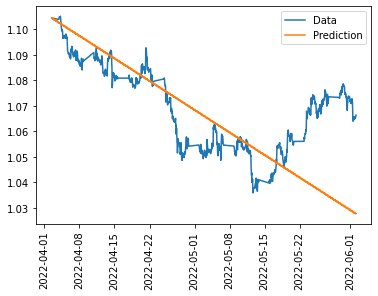

In [30]:
plt.plot(test_data['close'])
plt.plot(future_forecast['close'])
plt.xticks(rotation='vertical')
plt.legend(('Data','Prediction'))

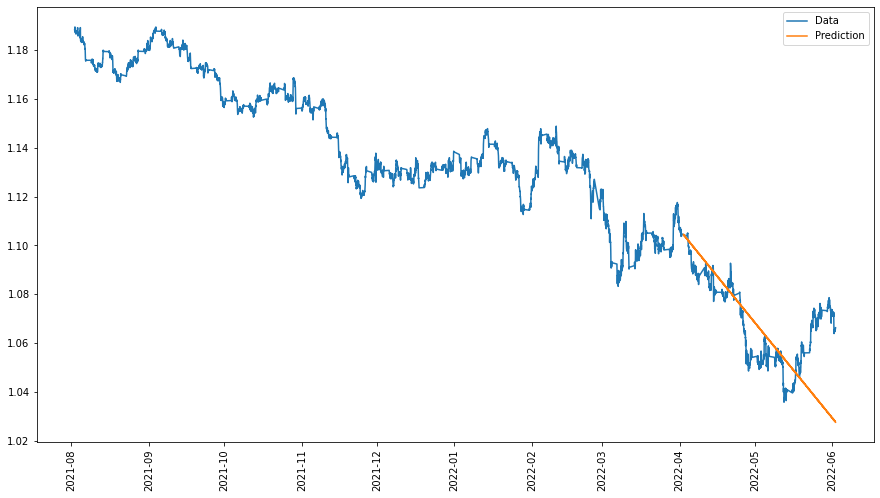

In [31]:
plt.figure(figsize=(15,8))
plt.plot(df['close'])
plt.plot(future_forecast.shift(1))
plt.xticks(rotation='vertical')
plt.legend(('Data','Prediction'))
plt.show()

In [32]:
residuals_1 = test_data['close'] - future_forecast['close']
print('Mean Absolute Percent Error: ', round(np.mean(abs(residuals_1/test_data['close'])),4))
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals_1**2)))

Mean Absolute Percent Error:  0.0117
Root Mean Squared Error:  0.01749188475029529


**Rolling Forcast of AutoArima**

In [35]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
  train_data = df[:end_date - timedelta(hours=1)]
  model_ARIMA = ARIMA(train_data['close'], order=(0,1,0))
  model_ARIMA_fit = model_ARIMA.fit()
  pred_ARIMA = model_ARIMA_fit.predict(end_date)
  predictions_rolling.loc[end_date] = pred_ARIMA.loc[end_date]

In [36]:
predictions_rolling = pd.DataFrame(data=predictions_rolling, index=test_data.index, columns=['close'])
predictions_rolling

,close
time,
2022-04-02 11:00:00,-0.000014
2022-04-02 12:00:00,-0.000014
2022-04-02 13:00:00,-0.000014
2022-04-02 14:00:00,-0.000014
2022-04-02 15:00:00,-0.000014
...,...
2022-06-02 02:00:00,-0.000017
2022-06-02 03:00:00,-0.000017
2022-06-02 04:00:00,-0.000017


In [37]:
residuals_rolling = test_data['close'] - predictions_rolling['close']
residuals_rolling

time
2022-04-02 11:00:00    1.104482
2022-04-02 12:00:00    1.104464
2022-04-02 13:00:00    1.104446
2022-04-02 14:00:00    1.104427
2022-04-02 15:00:00    1.104409
                         ...   
2022-06-02 02:00:00    1.064997
2022-06-02 03:00:00    1.065437
2022-06-02 04:00:00    1.065767
2022-06-02 05:00:00    1.065817
2022-06-02 06:00:00    1.066327
Freq: H, Name: close, Length: 1460, dtype: float64

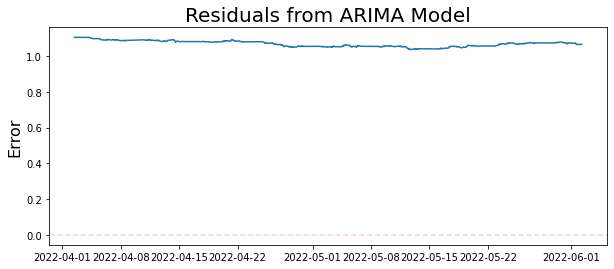

In [39]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r',linestyle='--',alpha=0.2)
for year in range(2022,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-01'), color='k', linestyle='--',alpha=0.2)

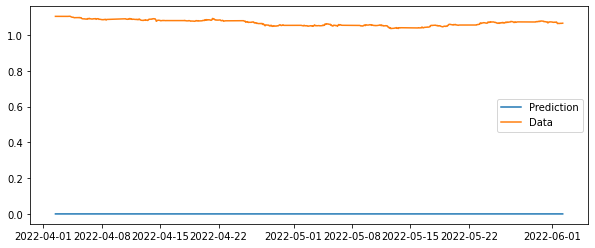

In [40]:
plt.figure(figsize=(10,4))
plt.plot(predictions_rolling['close'])
plt.plot(test_data['close'])
plt.legend(('Prediction','Data'))

In [41]:
print('Mean Absolute Percent Error: ', round(np.mean(abs(residuals_rolling/test_data['close'])),4))
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals_1**2)))

Mean Absolute Percent Error:  1.0
Root Mean Squared Error:  0.01749188475029529


**ARMA**

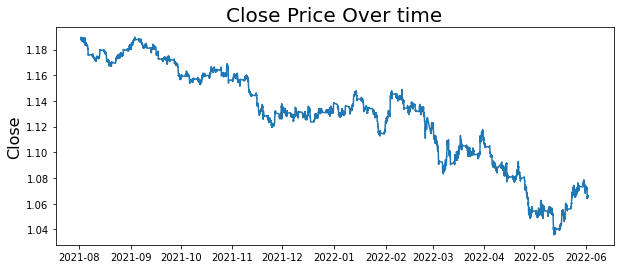

In [42]:
plt.figure(figsize=(10,4))
plt.plot(df.close)
plt.title('Close Price Over time', fontsize=20)
plt.ylabel('Close',fontsize=16)
for year in range(2022, 2022):
  plt.axvline(pd.to_datetime(str(year)+ '-10-01'),color='k', linestyle='--', alpha=0.2)

In [43]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [44]:
adf_test(df.close)

ADF Statistics: -0.8837095428972238
p-value: 0.7932897521233111
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
adf_test(df.close.diff().dropna())

ADF Statistics: -87.50919668164492
p-value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


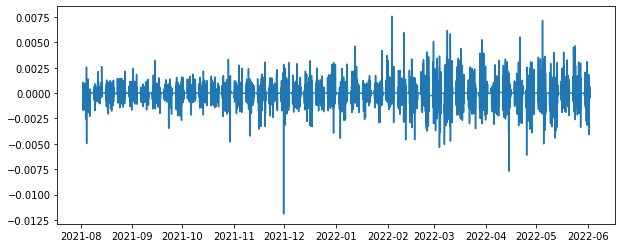

In [47]:
plt.figure(figsize=(10,4))
plt.plot(df.close.diff().dropna())
for year in range(2022,2022):
  plt.axvline(pd.to_datetime(str(year)+'-08-02'), color='k',linestyle='--',alpha=0.2)

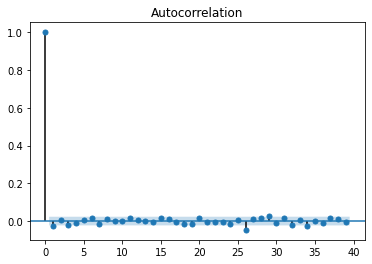

In [48]:
acf_plot = plot_acf(df.close.diff().dropna())

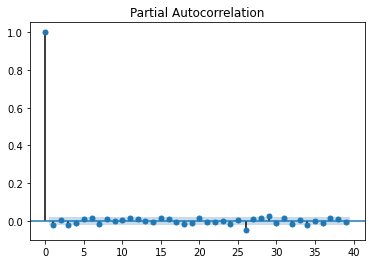

In [49]:
pacf_plot = plot_pacf(df.close.diff().dropna())

In [50]:
from statsmodels.tsa.arima_model import ARMA
def evaluate_arima_model(X, ar_order):
	# prepare training dataset
  train_size = int(len(X)*0.8)
  train, test = X[0:train_size], X[train_size:]
  model_ARMA = ARMA(train_data, order=ar_order)
  model_ARMA_fit = model_ARMA.fit()
  pred_start_date = test.index[0]
  pred_end_date = test.index[-1]
  predict_ARMA = model_ARMA_fit.predict(start=pred_start_date, end=pred_end_date)
  rmse = np.sqrt(mean_squared_error(test, predict_ARMA))
  return rmse

In [51]:
def evaluate_models(dataset, p_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for q in q_values:
      order = (p,q)
      try:
        rmse = evaluate_arima_model(dataset, order)
        if rmse < best_score:
          best_score, best_cfg = rmse, order
        print('ARMA%s RMSE=%.3f' % (order,rmse))
      except:
        continue
  print('Best ARMA%s RMSE=%.3f' % (best_cfg, best_score))

In [52]:
p_values = [0,1,2]
q_values = [0,1,2]
evaluate_models(df.close, p_values, q_values)

ARMA(0, 0) RMSE=0.062
ARMA(0, 1) RMSE=0.032
ARMA(0, 2) RMSE=0.017
ARMA(1, 0) RMSE=0.001
ARMA(1, 1) RMSE=0.001
ARMA(1, 2) RMSE=0.001
ARMA(2, 0) RMSE=0.001
ARMA(2, 1) RMSE=0.001
ARMA(2, 2) RMSE=0.001
Best ARMA(2, 1) RMSE=0.001


In [53]:
model_arma = ARMA(train_data['close'], order=(2,1))
model_fit_arma = model_arma.fit()
model_fit_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 7296
Model:                     ARMA(2, 1)   Log Likelihood               41057.476
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 02 Jun 2022   AIC                         -82104.953
Time:                        07:33:41   BIC                         -82070.477
Sample:                    08-02-2021   HQIC                        -82093.098
                         - 06-02-2022                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1276      0.041     27.283      0.000       1.047       1.209
ar.L1.close     0.2924        nan        nan        nan         nan         nan
ar.L2.close     0.7073        nan        nan        nan         nan         nan
ma.L1.close     0.6884        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2           -1.4136           +0.0000j            1.4136            0.5000
MA.1           -1.4525           +0.0000j            1.4525            0.5000
-----------------------------------------------------------------------------
"""

In [54]:
predictions_arma = model_fit_arma.predict(start=pred_start_date, end=pred_end_date)

In [55]:
residuals_2 = test_data['close'] - predictions_arma
print('Mean Absolute Percent Error: ', round(np.mean(abs(residuals_2/test_data['close'])),4))
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals_2**2)))

Mean Absolute Percent Error:  0.0006
Root Mean Squared Error:  0.0010645128444140319


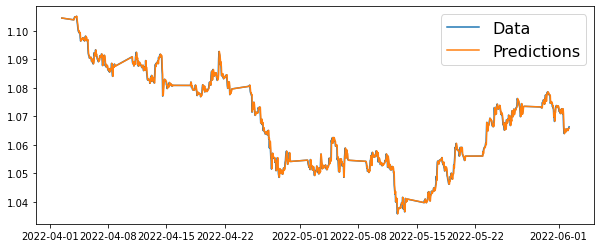

In [56]:
plt.figure(figsize=(10,4))
plt.plot(test_data['close'])
plt.plot(predictions_arma)
plt.legend(('Data','Predictions'), fontsize=16)

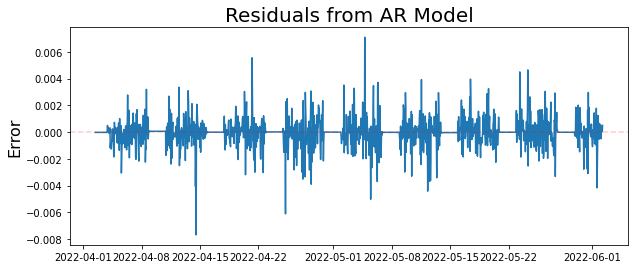

In [57]:
plt.figure(figsize=(10,4))
plt.plot(residuals_2)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

**FORECAST THE NEXT 7 days**

In [64]:
test_data.index[-1]

Timestamp('2022-06-02 06:00:00', freq='H')

In [91]:
dt = pd.date_range('2022-06-02 07:00:00', periods=24, freq='H').tolist()
new_predict = pd.DataFrame({'DATE':dt})
new_predict['DATE'] = pd.to_datetime(new_predict['DATE'])
new_predict['close'] = 0
new_predict.Timestamp = pd.to_datetime(new_predict.DATE, format = '%Y-%m-%d %H:%m:%s')
new_predict.index = new_predict.Timestamp
new_predict = new_predict.asfreq('H')
new_predict.drop('DATE',axis=1,inplace=True)

In [92]:
new_predict.index

DatetimeIndex(['2022-06-02 07:00:00', '2022-06-02 08:00:00',
               '2022-06-02 09:00:00', '2022-06-02 10:00:00',
               '2022-06-02 11:00:00', '2022-06-02 12:00:00',
               '2022-06-02 13:00:00', '2022-06-02 14:00:00',
               '2022-06-02 15:00:00', '2022-06-02 16:00:00',
               '2022-06-02 17:00:00', '2022-06-02 18:00:00',
               '2022-06-02 19:00:00', '2022-06-02 20:00:00',
               '2022-06-02 21:00:00', '2022-06-02 22:00:00',
               '2022-06-02 23:00:00', '2022-06-03 00:00:00',
               '2022-06-03 01:00:00', '2022-06-03 02:00:00',
               '2022-06-03 03:00:00', '2022-06-03 04:00:00',
               '2022-06-03 05:00:00', '2022-06-03 06:00:00'],
              dtype='datetime64[ns]', name='DATE', freq='H')

In [93]:
future_forecast = model_fit_arma.predict(start=test_data.index[0], end=new_predict.index[-1])
future_forecast

2022-04-02 11:00:00    1.104489
2022-04-02 12:00:00    1.104471
2022-04-02 13:00:00    1.104453
2022-04-02 14:00:00    1.104435
2022-04-02 15:00:00    1.104417
                         ...   
2022-06-03 02:00:00    1.065984
2022-06-03 03:00:00    1.065992
2022-06-03 04:00:00    1.066001
2022-06-03 05:00:00    1.066010
2022-06-03 06:00:00    1.066019
Freq: H, Length: 1484, dtype: float64

In [94]:
new_predict['new_predict'] = future_forecast[test_data.index[-1]:]

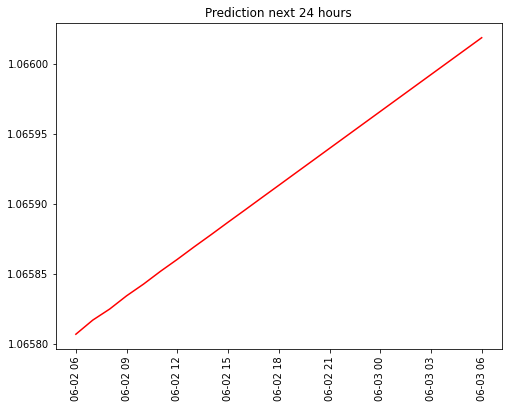

In [97]:
plt.figure(figsize=(8,6))
plt.plot(future_forecast[test_data.index[-1]:], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 24 hours')
plt.show()

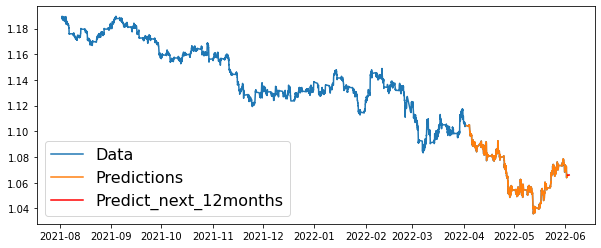

In [98]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.plot(predictions_arma)
plt.plot(future_forecast[test_data.index[-1]:], color='red')
plt.legend(('Data','Predictions','Predict_next_12months'), fontsize=16)

**Rolling Forecast**

In [102]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
  train_data = df[:end_date - timedelta(hours=1)]
  model_roll = ARMA(train_data, order=(1,0))
  model_roll_fit = model_roll.fit()
  pred_roll = model_roll_fit.predict(end_date)
  predictions_rolling.loc[end_date] = pred_roll.loc[end_date]

In [103]:
predictions_rolling

2022-04-02 11:00:00    1.104499
2022-04-02 12:00:00    1.104480
2022-04-02 13:00:00    1.104462
2022-04-02 14:00:00    1.104444
2022-04-02 15:00:00    1.104426
                         ...   
2022-06-02 02:00:00    1.065479
2022-06-02 03:00:00    1.064989
2022-06-02 04:00:00    1.065429
2022-06-02 05:00:00    1.065759
2022-06-02 06:00:00    1.065809
Length: 1460, dtype: float64

In [106]:
residuals_rolling = test_data['close'] - predictions_rolling
residuals_rolling

time
2022-04-02 11:00:00   -0.000031
2022-04-02 12:00:00   -0.000031
2022-04-02 13:00:00   -0.000031
2022-04-02 14:00:00   -0.000031
2022-04-02 15:00:00   -0.000031
                         ...   
2022-06-02 02:00:00   -0.000499
2022-06-02 03:00:00    0.000431
2022-06-02 04:00:00    0.000321
2022-06-02 05:00:00    0.000041
2022-06-02 06:00:00    0.000501
Freq: H, Length: 1460, dtype: float64

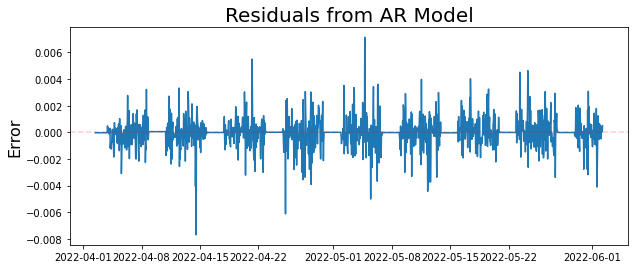

In [107]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r',linestyle='--',alpha=0.2)
for year in range(2022,2022):
    plt.axvline(pd.to_datetime(str(year)+'-04-02'), color='k', linestyle='--',alpha=0.2)

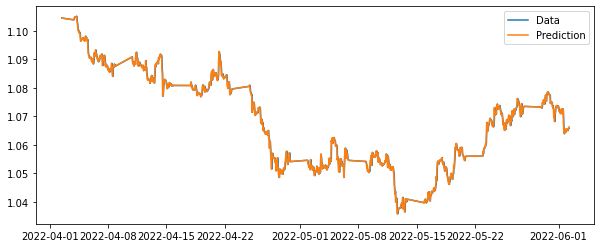

In [108]:
plt.figure(figsize=(10,4))
plt.plot(predictions_rolling)
plt.plot(test_data['close'])
plt.legend(('Data','Prediction'))

In [109]:
df

,close
time,
2021-08-02 06:00:00,1.18827
2021-08-02 07:00:00,1.18813
2021-08-02 08:00:00,1.18847
2021-08-02 09:00:00,1.18954
2021-08-02 10:00:00,1.18909
...,...
2022-06-02 02:00:00,1.06498
2022-06-02 03:00:00,1.06542
2022-06-02 04:00:00,1.06575


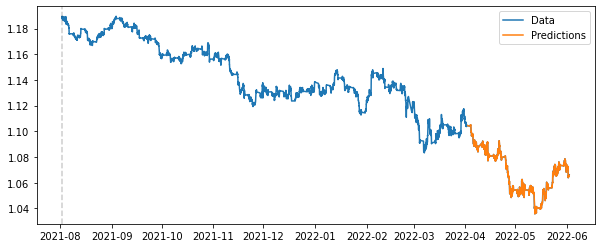

In [110]:
plt.figure(figsize=(10,4))
plt.plot(df['close'])
plt.plot(predictions_rolling)
plt.legend(('Data','Predictions'))
for year in range(2021,2022):
    plt.axvline(pd.to_datetime(str(year) + '-08-02'), color='k', linestyle='--',alpha=0.2)

**Predict 24h with rolling forecast**

In [113]:
future_forecast_roll = model_roll_fit.predict(start=test_data.index[0], end=new_predict.index[-1])
future_forecast_roll

2022-04-02 11:00:00    1.104489
2022-04-02 12:00:00    1.104471
2022-04-02 13:00:00    1.104453
2022-04-02 14:00:00    1.104435
2022-04-02 15:00:00    1.104416
                         ...   
2022-06-03 02:00:00    1.065990
2022-06-03 03:00:00    1.065999
2022-06-03 04:00:00    1.066008
2022-06-03 05:00:00    1.066017
2022-06-03 06:00:00    1.066026
Freq: H, Length: 1484, dtype: float64

In [114]:
future_1 = future_forecast_roll[len(test_data):]
future_1 = pd.DataFrame(future_1, columns=['close'])
future_1

,close
2022-06-02 07:00:00,1.065818
2022-06-02 08:00:00,1.065827
2022-06-02 09:00:00,1.065836
2022-06-02 10:00:00,1.065845
2022-06-02 11:00:00,1.065854
2022-06-02 12:00:00,1.065863
2022-06-02 13:00:00,1.065873
2022-06-02 14:00:00,1.065882
2022-06-02 15:00:00,1.065891
2022-06-02 16:00:00,1.065900


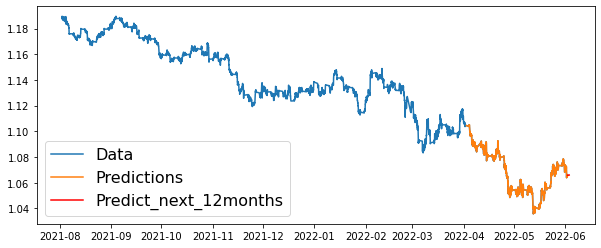

In [115]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.plot(predictions_rolling)
plt.plot(future_forecast_roll[test_data.index[-1]:], color='red')
plt.legend(('Data','Predictions','Predict_next_12months'), fontsize=16)